In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR10 Distilled

In [3]:
class CIFAR10_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR10_DM_index_files/ipc500_idx.csv')
index_file

,image_path,label
0,./CIFAR10_DM/ipc500/airplane/003746e7-c915-4d7...,0
1,./CIFAR10_DM/ipc500/airplane/0090a052-69a0-461...,0
2,./CIFAR10_DM/ipc500/airplane/0143960d-3978-448...,0
3,./CIFAR10_DM/ipc500/airplane/01ee79d8-a8fe-430...,0
4,./CIFAR10_DM/ipc500/airplane/0231edfd-42fd-477...,0
...,...,...
4995,./CIFAR10_DM/ipc500/truck/fb1fbeaf-b6c7-4da4-a...,9
4996,./CIFAR10_DM/ipc500/truck/fcd9e0b0-9b62-4d41-8...,9
4997,./CIFAR10_DM/ipc500/truck/fdefdd6d-2fd9-42f1-b...,9
4998,./CIFAR10_DM/ipc500/truck/ff83d309-da9a-459a-a...,9


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(64),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar10_distilled_train = CIFAR10_Distilled(index_file, transform)

cifar10_root = '../cifar10'
cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(64),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [6]:
batch_size = 16 # cut batch size to half for ipc50
train_data_loader, test_data_loader = get_data_loaders(cifar10_distilled_train, cifar10_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
model_name = 'alexnet'
dataset = 'cifar10_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
model = torchvision.models.alexnet(num_classes=10).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader)

c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1: 100%|██████████| 313/313 [00:11<00:00, 26.64it/s, loss=2.29]


epoch: 1 done, loss: 0.1440405547618866
Acc: 0.1017


Epoch 2: 100%|██████████| 313/313 [00:06<00:00, 46.57it/s, loss=2.05]


epoch: 2 done, loss: 0.13846443593502045
Acc: 0.1775


Epoch 3: 100%|██████████| 313/313 [00:06<00:00, 45.53it/s, loss=1.49]


epoch: 3 done, loss: 0.12341011315584183
Acc: 0.1972


Epoch 4: 100%|██████████| 313/313 [00:06<00:00, 47.25it/s, loss=1.05] 


epoch: 4 done, loss: 0.10041973739862442
Acc: 0.2367


Epoch 5: 100%|██████████| 313/313 [00:06<00:00, 46.67it/s, loss=1.13] 


epoch: 5 done, loss: 0.07891421765089035
Acc: 0.305


Epoch 6: 100%|██████████| 313/313 [00:06<00:00, 45.84it/s, loss=0.865]


epoch: 6 done, loss: 0.06167738512158394
Acc: 0.3031


Epoch 7: 100%|██████████| 313/313 [00:06<00:00, 51.50it/s, loss=0.791]


epoch: 7 done, loss: 0.05236363410949707
Acc: 0.3608


Epoch 8: 100%|██████████| 313/313 [00:06<00:00, 50.16it/s, loss=0.64] 


epoch: 8 done, loss: 0.043132226914167404
Acc: 0.3341


Epoch 9: 100%|██████████| 313/313 [00:06<00:00, 50.12it/s, loss=0.46] 


epoch: 9 done, loss: 0.03573381528258324
Acc: 0.3771


Epoch 10: 100%|██████████| 313/313 [00:06<00:00, 50.04it/s, loss=0.53] 


epoch: 10 done, loss: 0.02910788543522358
Acc: 0.3894


Epoch 11: 100%|██████████| 313/313 [00:06<00:00, 48.62it/s, loss=0.897] 


epoch: 11 done, loss: 0.02619318850338459
Acc: 0.4565


Epoch 12: 100%|██████████| 313/313 [00:06<00:00, 49.67it/s, loss=0.374] 


epoch: 12 done, loss: 0.022621072828769684
Acc: 0.4378


Epoch 13: 100%|██████████| 313/313 [00:06<00:00, 48.13it/s, loss=0.053] 


epoch: 13 done, loss: 0.019084421917796135
Acc: 0.4728


Epoch 14: 100%|██████████| 313/313 [00:07<00:00, 41.29it/s, loss=0.0685]


epoch: 14 done, loss: 0.017776750028133392
Acc: 0.498


Epoch 15: 100%|██████████| 313/313 [00:06<00:00, 49.38it/s, loss=0.295] 


epoch: 15 done, loss: 0.015230010263621807
Acc: 0.4537


Epoch 16: 100%|██████████| 313/313 [00:06<00:00, 48.75it/s, loss=0.146]  


epoch: 16 done, loss: 0.013861683197319508
Acc: 0.5001


Epoch 17: 100%|██████████| 313/313 [00:06<00:00, 49.63it/s, loss=0.357] 


epoch: 17 done, loss: 0.011356072500348091
Acc: 0.4952


Epoch 18: 100%|██████████| 313/313 [00:06<00:00, 48.57it/s, loss=0.0244] 


epoch: 18 done, loss: 0.01059746090322733
Acc: 0.4857


Epoch 19: 100%|██████████| 313/313 [00:06<00:00, 49.96it/s, loss=0.00985]


epoch: 19 done, loss: 0.010433976538479328
Acc: 0.5117


Epoch 20: 100%|██████████| 313/313 [00:06<00:00, 47.58it/s, loss=0.00769]


epoch: 20 done, loss: 0.008148156106472015
Acc: 0.5119


Epoch 21: 100%|██████████| 313/313 [00:06<00:00, 48.58it/s, loss=0.00476]


epoch: 21 done, loss: 0.0077017429284751415
Acc: 0.5158


Epoch 22: 100%|██████████| 313/313 [00:06<00:00, 48.96it/s, loss=0.0286] 


epoch: 22 done, loss: 0.007263332139700651
Acc: 0.5176


Epoch 23: 100%|██████████| 313/313 [00:06<00:00, 48.73it/s, loss=0.00108] 


epoch: 23 done, loss: 0.004741837736219168
Acc: 0.495


Epoch 24: 100%|██████████| 313/313 [00:06<00:00, 49.29it/s, loss=0.000955]


epoch: 24 done, loss: 0.006427899934351444
Acc: 0.4977


Epoch 25: 100%|██████████| 313/313 [00:06<00:00, 49.88it/s, loss=0.254]  


epoch: 25 done, loss: 0.005484378430992365
Acc: 0.467


Epoch 26: 100%|██████████| 313/313 [00:06<00:00, 49.18it/s, loss=0.00474] 


epoch: 26 done, loss: 0.005040707532316446
Acc: 0.5231


Epoch 27: 100%|██████████| 313/313 [00:06<00:00, 47.26it/s, loss=0.117]   


epoch: 27 done, loss: 0.0038247741758823395
Acc: 0.5126


Epoch 28: 100%|██████████| 313/313 [00:06<00:00, 48.37it/s, loss=0.00266]


epoch: 28 done, loss: 0.004377411678433418
Acc: 0.4937


Epoch 29: 100%|██████████| 313/313 [00:06<00:00, 47.91it/s, loss=0.139]   


epoch: 29 done, loss: 0.0034488977398723364
Acc: 0.4964


Epoch 30: 100%|██████████| 313/313 [00:06<00:00, 48.57it/s, loss=0.101]   


epoch: 30 done, loss: 0.004039481747895479
Acc: 0.5088


Epoch 31: 100%|██████████| 313/313 [00:06<00:00, 49.33it/s, loss=0.371]   


epoch: 31 done, loss: 0.0027376313228160143
Acc: 0.5176


Epoch 32: 100%|██████████| 313/313 [00:06<00:00, 49.56it/s, loss=0.000988]


epoch: 32 done, loss: 0.0025475602596998215
Acc: 0.5358


Epoch 33: 100%|██████████| 313/313 [00:06<00:00, 49.12it/s, loss=0.00904] 


epoch: 33 done, loss: 0.0014879570808261633
Acc: 0.542


Epoch 34: 100%|██████████| 313/313 [00:06<00:00, 50.85it/s, loss=0.0181]  


epoch: 34 done, loss: 0.0016894371947273612
Acc: 0.5328


Epoch 35: 100%|██████████| 313/313 [00:06<00:00, 49.71it/s, loss=0.000201]


epoch: 35 done, loss: 0.0019416636787354946
Acc: 0.5242


Epoch 36: 100%|██████████| 313/313 [00:06<00:00, 50.80it/s, loss=0.0704]  


epoch: 36 done, loss: 0.0017887410940602422
Acc: 0.5271


Epoch 37: 100%|██████████| 313/313 [00:06<00:00, 50.61it/s, loss=0.00284] 


epoch: 37 done, loss: 0.0013219814281910658
Acc: 0.5409


Epoch 38: 100%|██████████| 313/313 [00:06<00:00, 50.19it/s, loss=9.45e-6] 


epoch: 38 done, loss: 0.0014231845270842314
Acc: 0.5357


Epoch 39: 100%|██████████| 313/313 [00:06<00:00, 49.53it/s, loss=0.00489] 


epoch: 39 done, loss: 0.0011091516353189945
Acc: 0.5411


Epoch 40: 100%|██████████| 313/313 [00:06<00:00, 50.61it/s, loss=0.00807] 


epoch: 40 done, loss: 0.0016381755704060197
Acc: 0.544


Epoch 41: 100%|██████████| 313/313 [00:06<00:00, 49.07it/s, loss=0.00828] 


epoch: 41 done, loss: 0.000549078918993473
Acc: 0.544


Epoch 42: 100%|██████████| 313/313 [00:06<00:00, 50.10it/s, loss=0.00101] 


epoch: 42 done, loss: 0.0001225937157869339
Acc: 0.5468


Epoch 43: 100%|██████████| 313/313 [00:06<00:00, 50.25it/s, loss=3.51e-5] 


epoch: 43 done, loss: 5.860814417246729e-05
Acc: 0.5423


Epoch 44: 100%|██████████| 313/313 [00:06<00:00, 48.58it/s, loss=0.000562]


epoch: 44 done, loss: 0.003018678165972233
Acc: 0.5453


Epoch 45: 100%|██████████| 313/313 [00:06<00:00, 51.16it/s, loss=0.00173] 


epoch: 45 done, loss: 0.0014468847075477242
Acc: 0.5138


Epoch 46: 100%|██████████| 313/313 [00:06<00:00, 49.12it/s, loss=0.000303]


epoch: 46 done, loss: 0.00037220038939267397
Acc: 0.5353


Epoch 47: 100%|██████████| 313/313 [00:06<00:00, 50.08it/s, loss=0.000998]


epoch: 47 done, loss: 0.004394029267132282
Acc: 0.5409


Epoch 48: 100%|██████████| 313/313 [00:06<00:00, 49.96it/s, loss=0.000417]


epoch: 48 done, loss: 0.0005899340030737221
Acc: 0.5398


Epoch 49: 100%|██████████| 313/313 [00:06<00:00, 49.91it/s, loss=0.00392] 


epoch: 49 done, loss: 0.00026775302831083536
Acc: 0.541


Epoch 50: 100%|██████████| 313/313 [00:06<00:00, 48.91it/s, loss=0.0014]  


epoch: 50 done, loss: 0.0002035564393736422
Acc: 0.5406
Time taken: 595.143068 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.5468, tensor(0.2198, device='cuda:0'))

<AxesSubplot: >

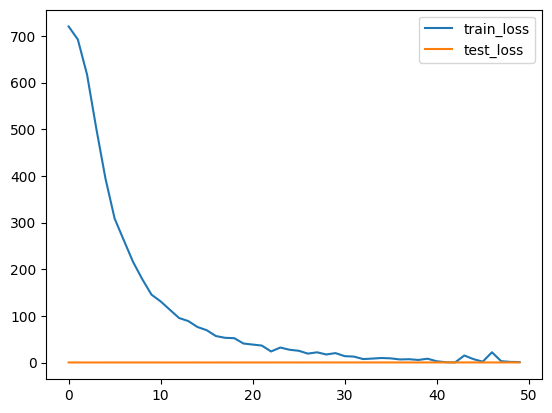

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])